In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import xlrd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime
np.random.seed(42)
import string
import lifetimes

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("online_retail_II.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [4]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [5]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [6]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [7]:
data = pd.concat([df1, df2], ignore_index=True)

In [8]:
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
data.shape

(1067371, 8)

In [10]:
data.isnull().sum()/data.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [11]:
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [12]:
data.isnull().sum() #Now let's check the data before droping these customer ID's

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64

In [13]:
data[data["Customer ID"].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [14]:
data.iloc[575:, :]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
576,C489524,21258,VICTORIAN SEWING BOX LARGE,-1,2009-12-01 11:48:00,12.75,15614.0,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25,12533.0,Germany
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55,12533.0,Germany
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [15]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)

In [16]:
data.isnull().sum() #Now's there is no null values available in our data

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [17]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [18]:
temp_df = pd.DataFrame(data["Country"].value_counts())

In [19]:
temp_df.head(10)

,count
Country,
United Kingdom,741301
Germany,17624
EIRE,16195
France,14202
Netherlands,5140
Spain,3811
Belgium,3123
Switzerland,3064
Portugal,2504


In [20]:
names  = temp_df.index

In [21]:
px.scatter(temp_df, y = "count", color = names)

As you can see the **United Kingdom** has the max transcations as compared to other countries. The one here to note is that the **"United Kingdom"** is the dominating class in this data which making our data looks kinda imbalanced between major class and the minority class. 

You can cross check the same after de-selecting the **United Kingdom** from the above chart and see how your axis transforms.

In [22]:
#Filter out non-numeric values in the 'Quantity' column

data = data[pd.to_numeric(data['Quantity'], errors='coerce').notnull()]   

In [23]:
# Convert the 'Quantity' column to numeric type

data['Quantity'] = pd.to_numeric(data['Quantity'])

In [24]:
# Group by 'Country', sum the 'Quantity', and sort in descending order

data.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    8353502
Netherlands        381951
EIRE               313373
Denmark            235218
Germany            224581
France             183339
Australia          103706
Sweden              87737
Switzerland         51831
Spain               45156
Name: Quantity, dtype: int64

In [25]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(), 
           y = "Price", size = "Price", title = "Average Price by Country", opacity = 0.48)

From the above dot plot we can conclude that the **Singapore** has the highest averge price followed by the **Norway** and **Malta**. Let's go deeper and see the distribution to better understand about our data.

In [26]:
countries = data["Country"].unique()

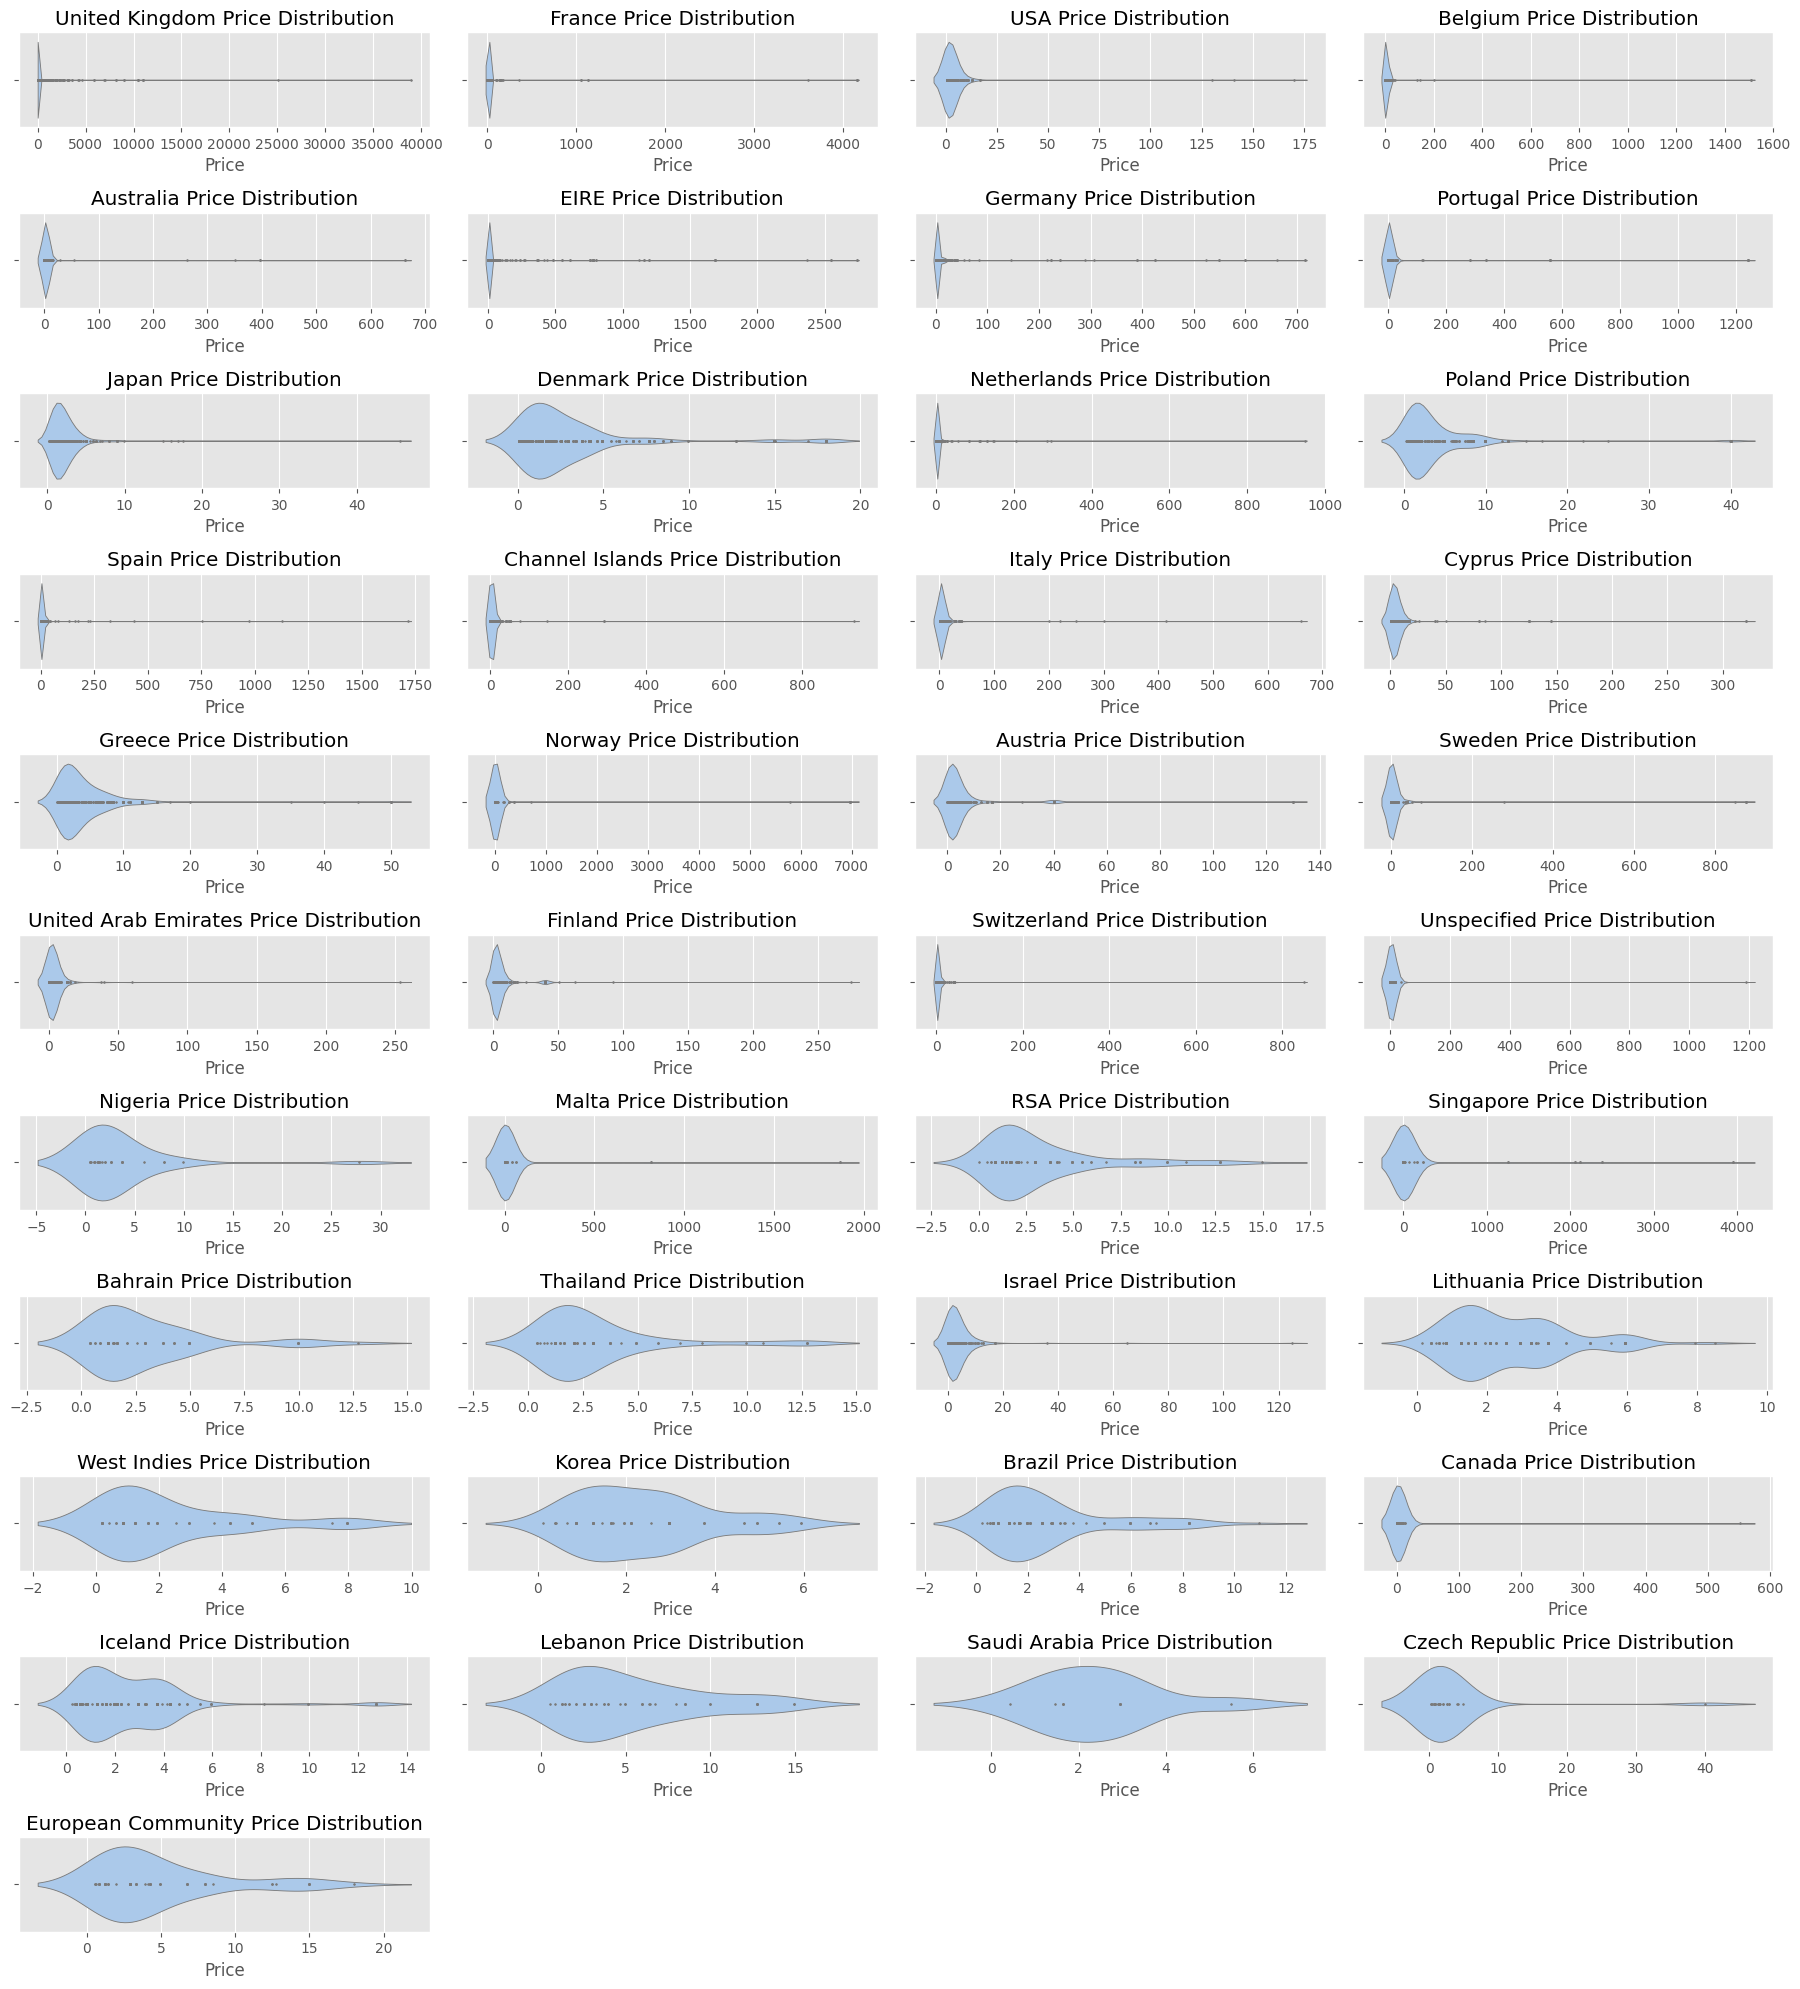

In [27]:
fig, ax = plt.subplots(11, 4, figsize=(18, 20))
axes_ = [axes_row for axes in ax for axes_row in axes]


num_axes = min(len(axes_), len(countries))

for i in range(num_axes):
    sns.violinplot(x="Price", data=data[data["Country"] == countries[i]], ax=axes_[i], inner="point", palette="pastel")
    axes_[i].set_title(countries[i] + ' ' + "Price Distribution")


for j in range(num_axes, len(axes_)):
    axes_[j].axis('off')

plt.tight_layout()
plt.show()


From the above plot what I can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [28]:
data["Invoice"] = data["Invoice"].astype(str)
data["StockCode"] = data["StockCode"].astype(str)

In [29]:
alpha = list(string.ascii_uppercase)

In [30]:
for index, row in data.iterrows():
    if row["Invoice"][-1] in alpha:
        # print(row["Invoice"])
        data.at[index, "Invoice"] = row["Invoice"][:len(row["Invoice"]) - 1]
        # print(df.at[index, "Invoice"])
    elif row["Invoice"][0] in alpha:
        # print(row["Invoice"])
        data.at[index, "Invoice"] = row["Invoice"][1:]
        # print(df.at[index, "Invoice"])
      
    if row["StockCode"][-1] in alpha:
        # print(row["StockCode"])
        data.at[index, "StockCode"] = row["StockCode"][:len(row["StockCode"]) - 1]
        # print(df.at[index, "StockCode"])
    elif row["StockCode"][0] in alpha:
        # print(row["StockCode"])
        data.at[index, "StockCode"] = row["StockCode"][1:]
        # print(df.at[index, "StockCode"])

data["Invoice"] = pd.to_numeric(data["Invoice"], errors='coerce').fillna(0).astype(int)
data["StockCode"] = pd.to_numeric(data["StockCode"], errors='coerce').fillna(0).astype(int)


In [31]:
#Total Number of Unique Invoices 
len(data["Invoice"].unique())

44876

In [32]:
temp_invoice_df = data.select_dtypes(exclude=['datetime64']).groupby('Invoice').sum()
temp_invoice_df.head(10)

,StockCode,Description,Quantity,Price,Customer ID,Country
Invoice,,,,,,
489434,352425,15CM CHRISTMAS GLASS BALL 20 LIGHTSPINK CHERRY...,166,32.65,104680.0,United KingdomUnited KingdomUnited KingdomUnit...
489435,89247,"CAT BOWL DOG BOWL , CHASING BALL DESIGNHEART M...",60,10.50,52340.0,United KingdomUnited KingdomUnited KingdomUnit...
489436,704982,DOOR MAT BLACK FLOCK LOVE BUILDING BLOCK WORDH...,193,70.88,248482.0,United KingdomUnited KingdomUnited KingdomUnit...
489437,643391,CHRISTMAS CRAFT HEART DECORATIONSCHRISTMAS CRA...,145,83.45,353326.0,United KingdomUnited KingdomUnited KingdomUnit...
489438,994040,DINOSAURS WRITING SET SET OF MEADOW FLOWER S...,826,44.05,307734.0,United KingdomUnited KingdomUnited KingdomUnit...
489439,698182,CHRISTMAS PUDDING TRINKET POT BAKING SET 9 PIE...,219,67.64,240958.0,FranceFranceFranceFranceFranceFranceFranceFran...
489440,44699,"CAT BOWL DOG BOWL , CHASING BALL DESIGN",16,6.30,36174.0,United KingdomUnited Kingdom
489441,150599,BIRD DECORATION RED SPOTBAKING SET 9 PIECE RET...,102,12.17,72348.0,United KingdomUnited KingdomUnited KingdomUnit...
489442,755792,UNION JACK GUNS & ROSES DOORMATSCOTTIE DOG HO...,275,46.94,313605.0,United KingdomUnited KingdomUnited KingdomUnit...


In [33]:
temp_invoice_df.reset_index(inplace = True)

In [34]:
#Below are the top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

,Invoice,StockCode
13782,518505,1900358
16579,524174,1900358
3830,497946,1048893
44838,581483,23843
25017,541431,23166
5470,501534,258626
2657,495194,308337
5860,502269,87927
2013,493819,3382258
1309,491812,2958708


In [35]:
data["Price"] = pd.to_numeric(data["Price"], errors='coerce')
data.groupby(["Invoice"])["Price"].mean().head(15).sort_values(ascending=False)

Invoice
489444    141.000000
489447    130.000000
489434      4.081250
489436      3.730526
489437      3.628261
489439      3.560000
489440      3.150000
489446      3.118519
489441      3.042500
489448      2.970000
489435      2.625000
489438      2.591176
489445      2.477895
489443      2.370000
489442      2.040870
Name: Price, dtype: float64

I have grouped the data by Invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number **489444** & **489447** has outspent others. So to gain some better clarity, let's check these 2 invoices and get insights on how much quantity they have purchased so far.

In [36]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
126,489444,0,POSTAGE,1,2009-12-01 09:55:00,141.0,12636.0,USA
173,489447,0,POSTAGE,1,2009-12-01 10:10:00,130.0,12362.0,Belgium


As you can see above, These 2 invoices with invoice number **489444** and **489447** had only single transaction, that's why the average price was too high.

### **INITIAL EDA INSIGHTS:**

1) Most of the customers are from the United Kingdom followed by the Germany, EIRE & France.

2) If we check the average price sale by countries, what we have observed is that Singapore has the highest averge price sale followed by the Norway and Malta.

3) Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values.

4) There are total 44876 uniques purchased happend so far.

5) We have also observed some of the Invoices who have purchased most of the quantities within 2 year of span.

6) When it comes to the average spend there are 2 invoices with number 489444 and 489447 having the highest average spent but upon inspection we also found the average product purchase was only 1 which is from USA followed by Belgium.

In [37]:
#Let's look at the data once again & see what else insights we can get from the data itself
data.head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


### **Exploratory Data Analysis Continued.....**

<Axes: xlabel='Description'>

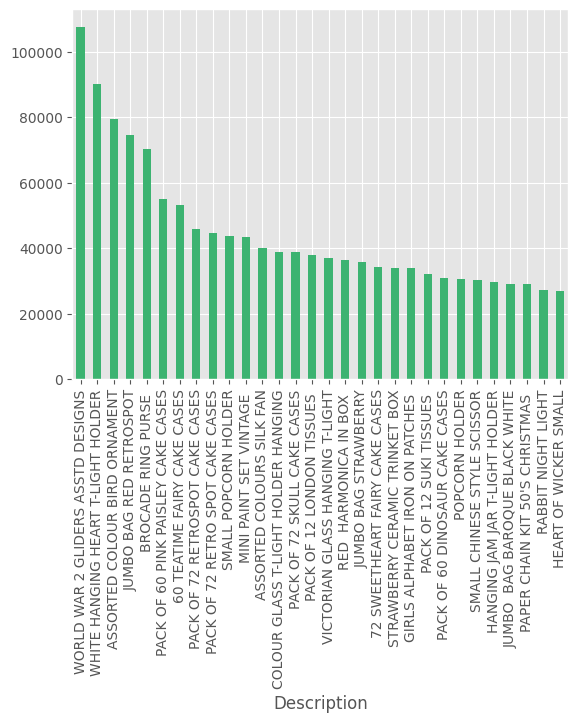

In [38]:
data.groupby("Description").agg({'Quantity': 'sum'}).sort_values(
    by = "Quantity", ascending = False).head(30)["Quantity"].plot(kind = "bar", color = 'mediumseagreen')

In [39]:
temp_data = data.copy()

In [40]:
temp_data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [41]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [42]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [43]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping) 

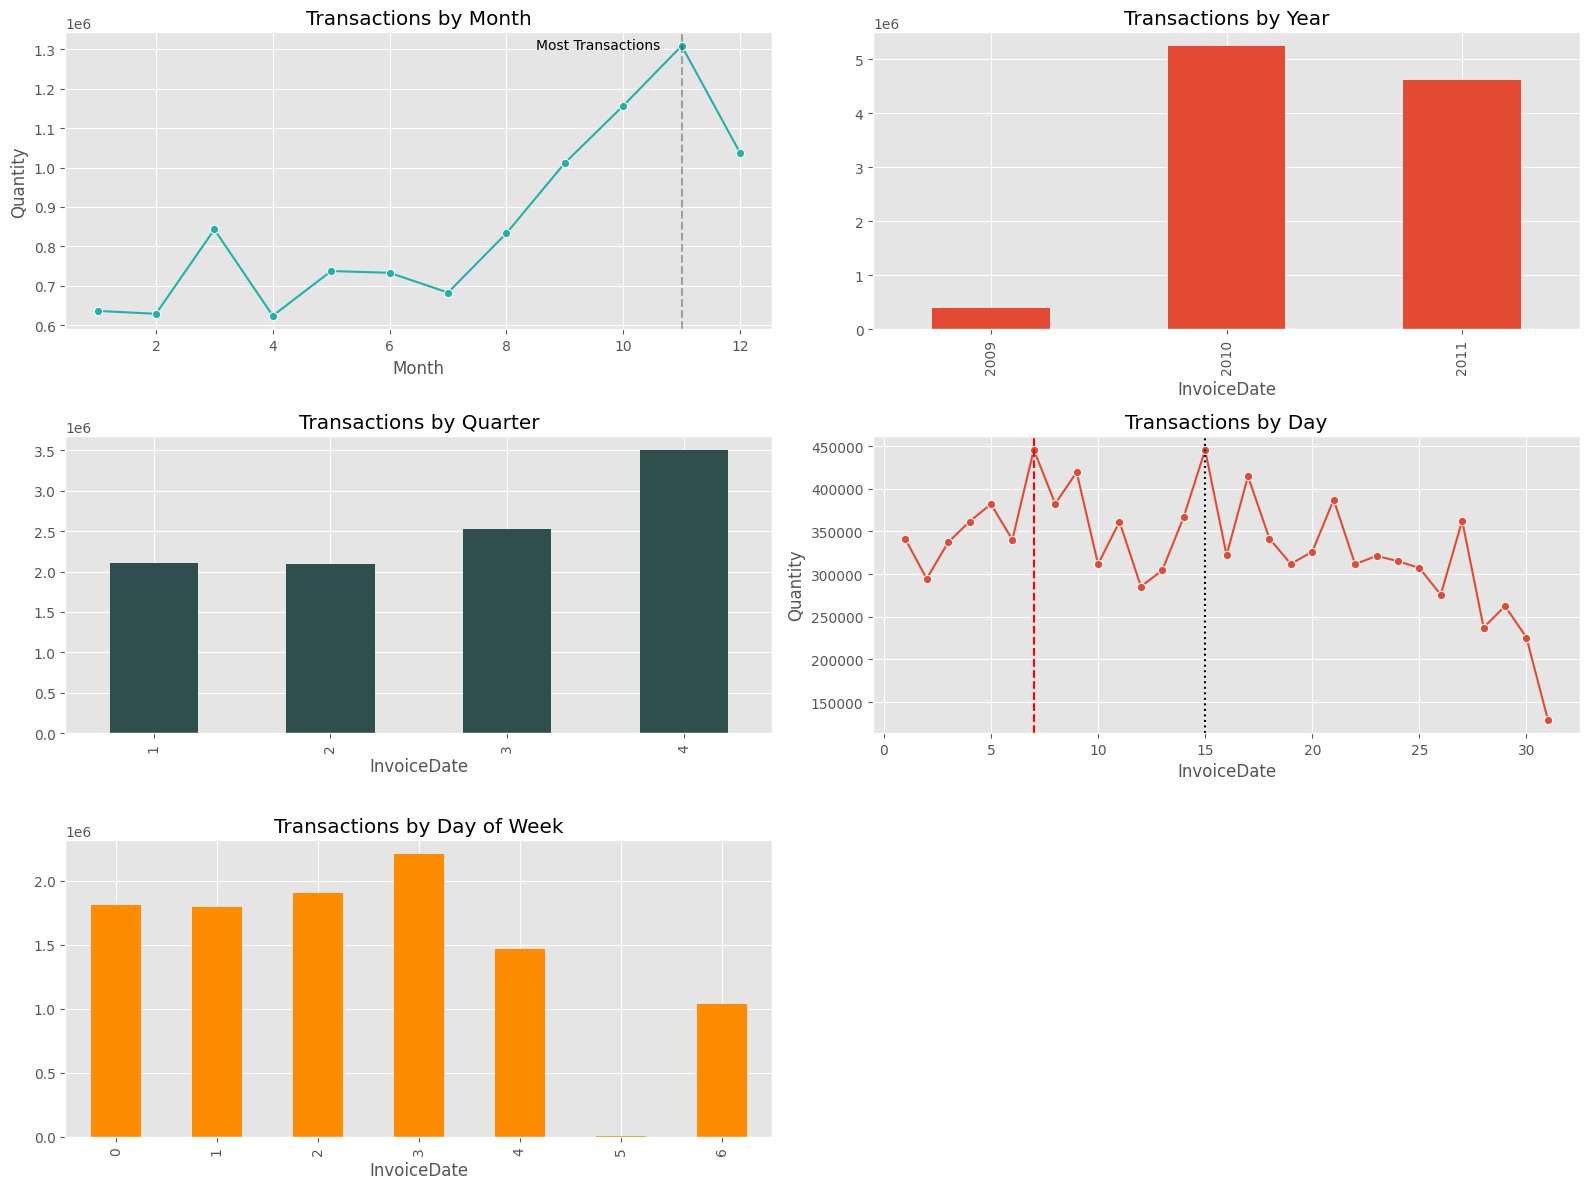

In [44]:
plt.figure(figsize=(16,12))

# Plotting Transactions by Month
plt.subplot(3,2,1)
temp_data["Month"] = temp_data["InvoiceDate"].dt.month
sns.lineplot(x="Month", y="Quantity", data=temp_data.groupby("Month")["Quantity"].sum().reset_index(), marker="o", color="lightseagreen")
plt.axvline(11, color="k", linestyle='--', alpha=0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")

# Plotting Transactions by Year
plt.subplot(3,2,2)
temp_data.groupby(temp_data["InvoiceDate"].dt.year)["Quantity"].sum().plot(kind="bar")
plt.title("Transactions by Year")

# Plotting Transactions by Quarter
plt.subplot(3,2,3)
temp_data.groupby(temp_data["InvoiceDate"].dt.quarter)["Quantity"].sum().plot(kind="bar", color="darkslategrey")
plt.title("Transactions by Quarter")

# Plotting Transactions by Day of Month
plt.subplot(3,2,4)
day_data = temp_data.groupby(temp_data["InvoiceDate"].dt.day)["Quantity"].sum().reset_index()
# print(day_data)  # Debug information
sns.lineplot(x=day_data["InvoiceDate"], y="Quantity", data=day_data, marker="o")
plt.axvline(7, color='r', linestyle='--')
plt.axvline(15, color='k', linestyle="dotted")
plt.title("Transactions by Day")

# Plotting Transactions by Day of Week
plt.subplot(3,2,5)
temp_data.groupby(temp_data["InvoiceDate"].dt.dayofweek)["Quantity"].sum().plot(kind="bar", color="darkorange")
plt.title("Transactions by Day of Week")

plt.tight_layout()
plt.show()


In [45]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 23
Total Number of Transactions in 2009: 390286
--------------------------------------------
Total Number of Countries in 2009: 37
Total Number of Transactions in 2009: 5233315
--------------------------------------------
Total Number of Countries in 2009: 36
Total Number of Transactions in 2009: 4610527


Through this analysis what conclusion we can make is that may be the company has started their operations in other countries and started to expand their business further.

In [46]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [47]:
no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [48]:
temp = data.groupby(["Country", "Description"], as_index=False)["Quantity"].sum()

In [49]:
temp = pd.DataFrame(temp)

### Top 8 Countries With Most Transactions

In [50]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

In [51]:
top_8_countries

['United Kingdom',
 'Netherlands',
 'EIRE',
 'Denmark',
 'Germany',
 'France',
 'Australia',
 'Sweden']

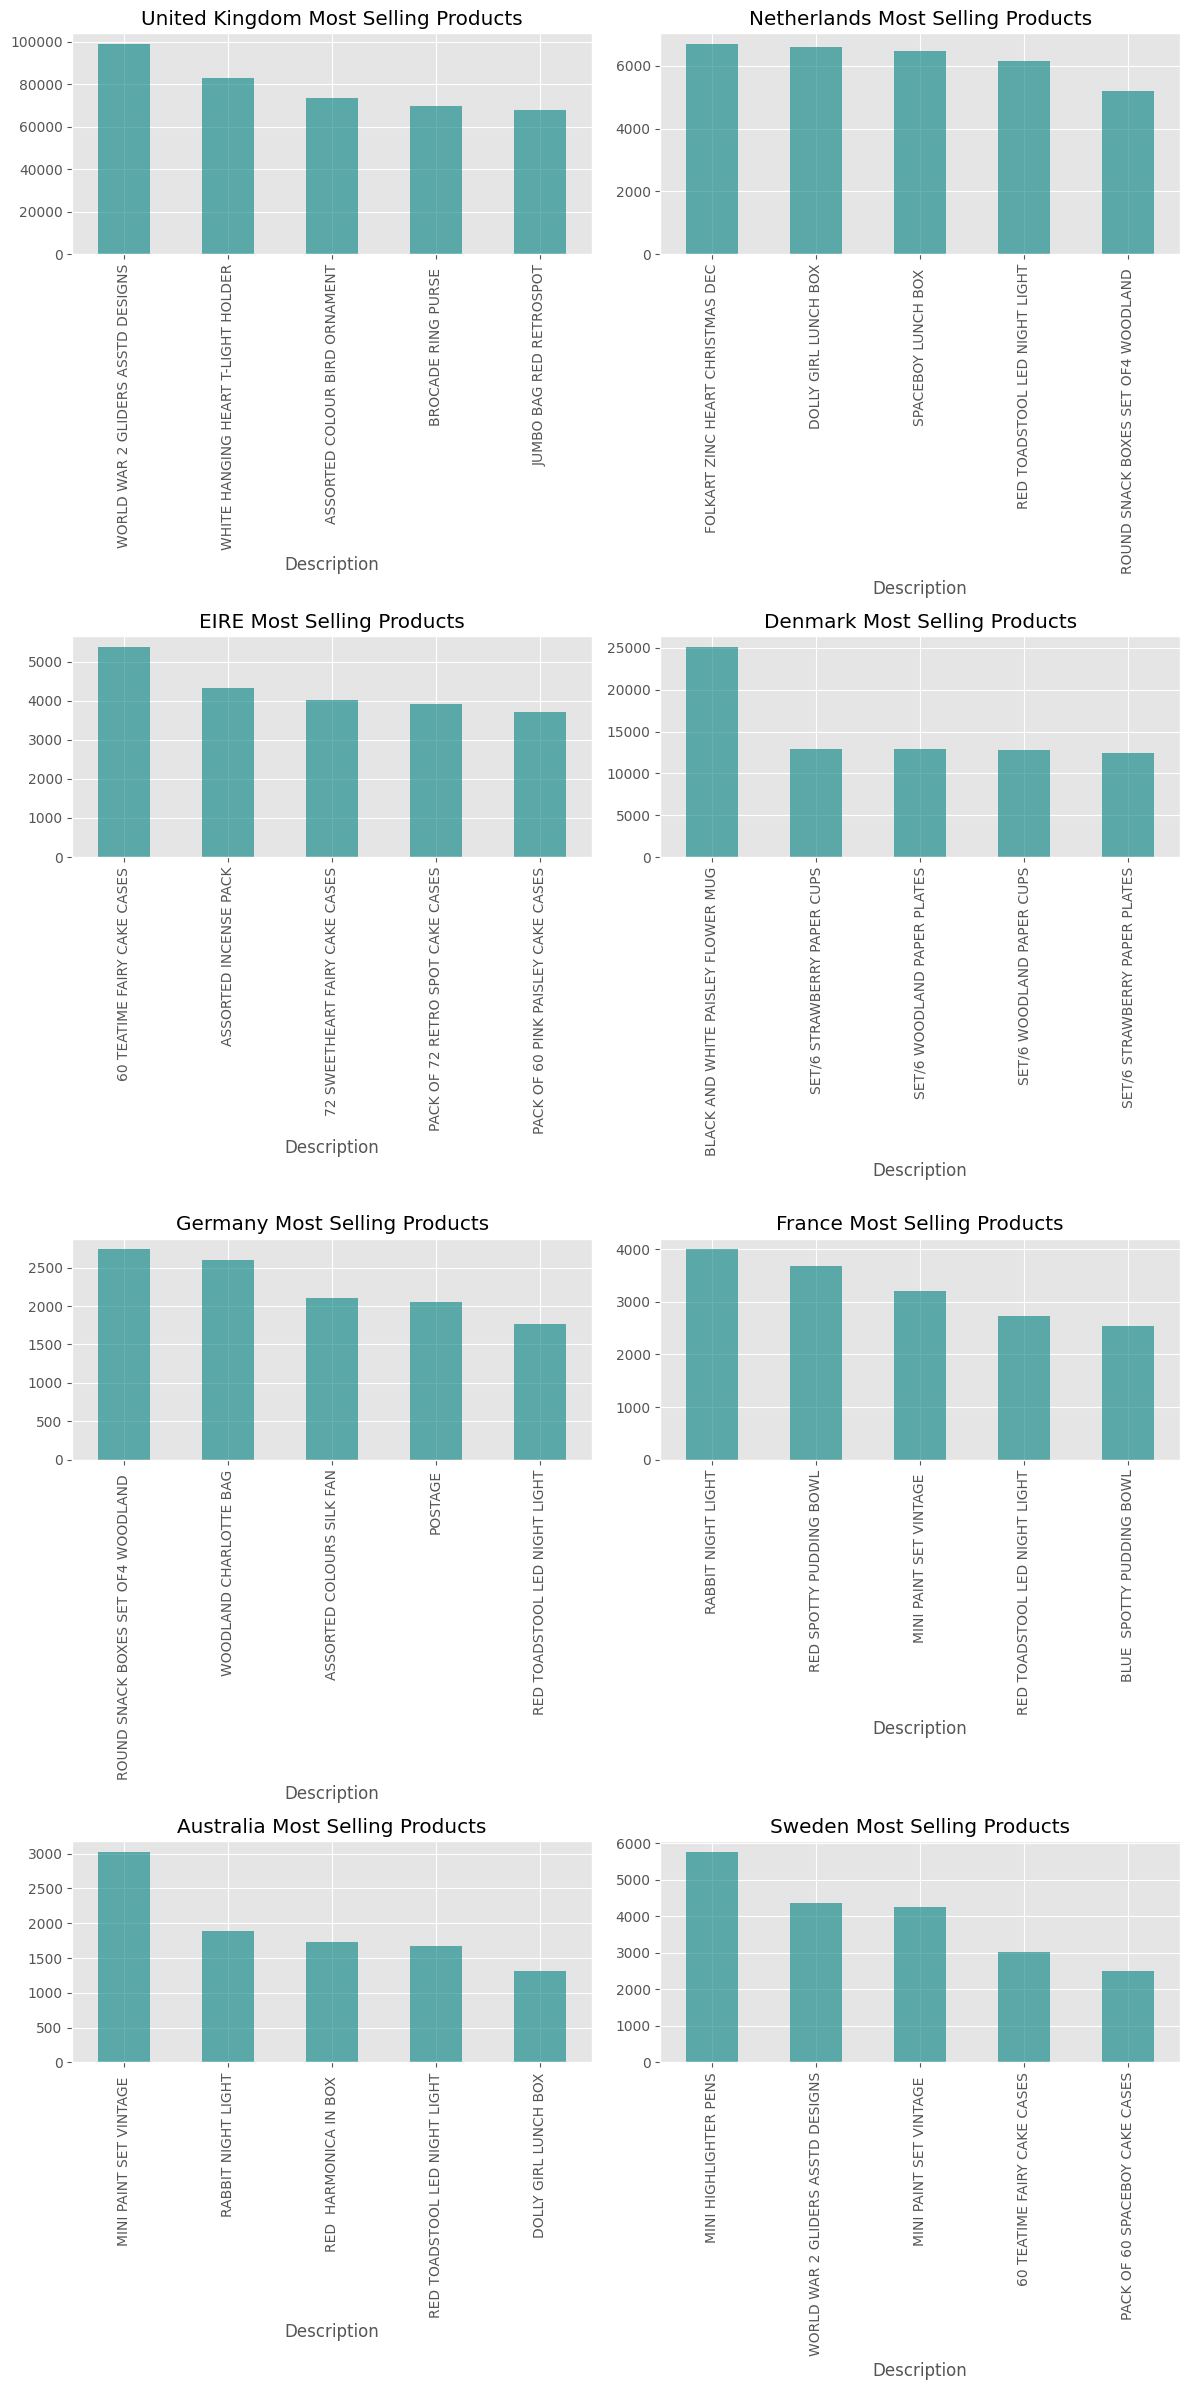

In [52]:
plt.figure(figsize=(12,24))
for i, country in enumerate(top_8_countries):
    ax = plt.subplot(4,2, i+1)
    plt.title(country + ' '+ "Most Selling Products")
    temp_data[temp_data["Country"] == country].groupby("Description")["Quantity"].sum().nlargest(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()
plt.show()

### Top 8 Countries with Least Transactions

In [53]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]

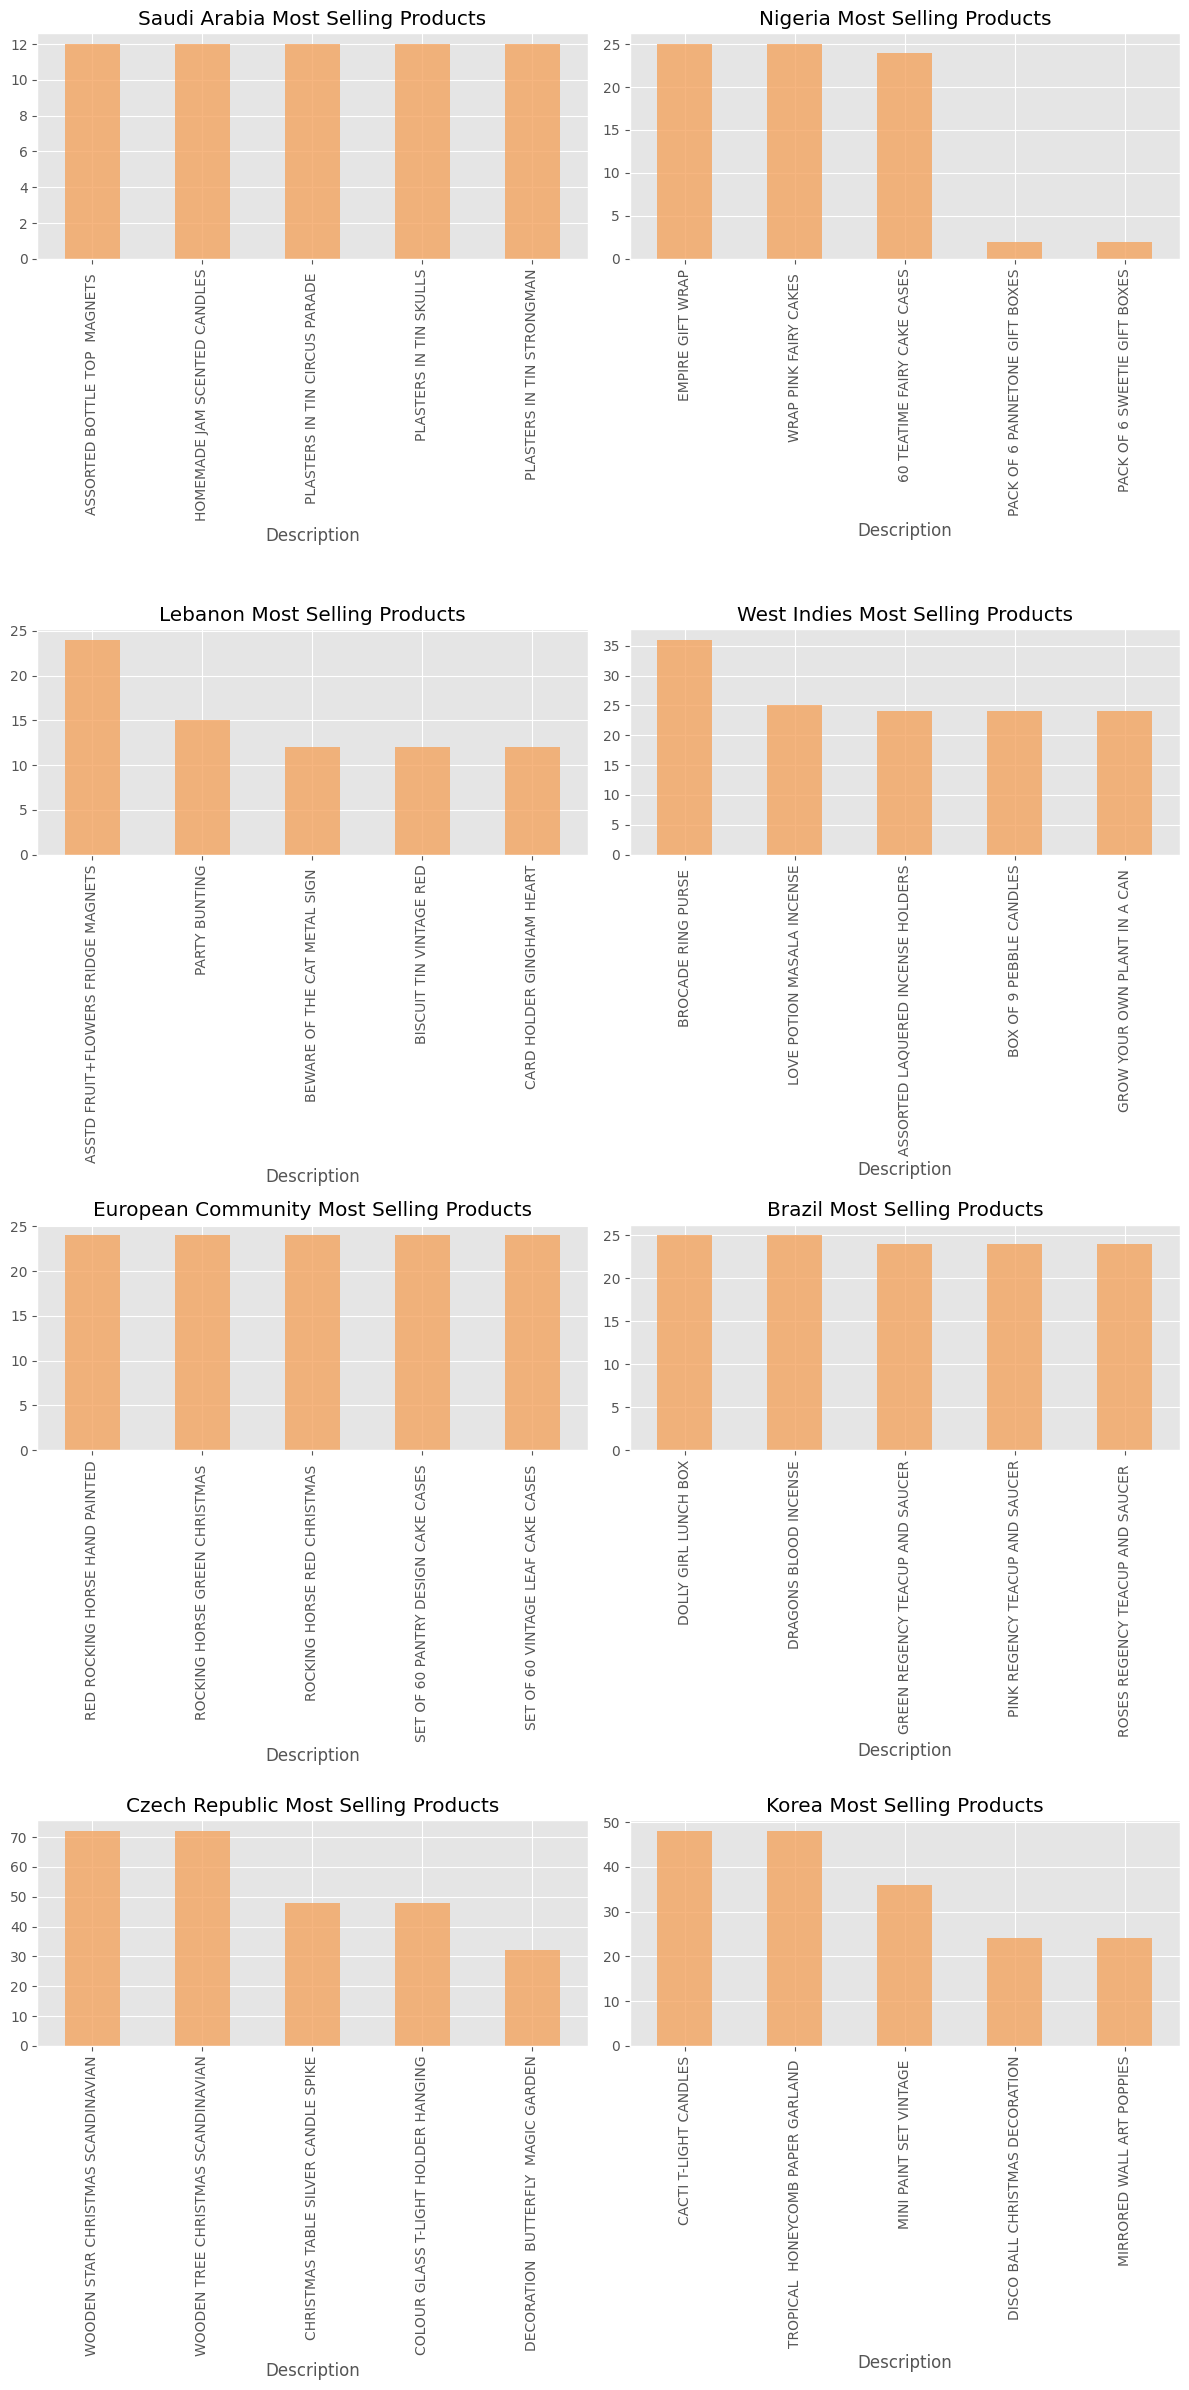

In [54]:
plt.figure(figsize=(12,24))
for i, country in enumerate(least_8_country):
    ax = plt.subplot(4,2, i+1)
    plt.title(country + ' '+ "Most Selling Products")
    temp_data[temp_data["Country"] == country].groupby("Description")["Quantity"].sum().nlargest(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)
    plt.tight_layout()
plt.show()

### **EDA INSIGHTS:**


1) Our Top 5 Best Selling Products are **World War 2 Gliders**, **White Hanging Heart**, **Assorted Colour Bird**, **Jumbo Bag Red**, **Brocade Ring**.

2) Most Transactions happened in the month of Novemeber which is evident due to festive seasons.

3) 2010 is the year in which we have the most transactions followed by the 2011

4) Q4 being the highest when it comes transactions.

5) It also observed that in the end of the 1st week and starting of the 3rd week, people tends to buy more.

6) People loves to shop on Thursday followed by Tuesday and Wednesday.


### RFM Estimation - (Recency, Frequency, Monetary)

In [55]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [56]:
data["Total Amount"] = data["Quantity"]*data["Price"]

In [57]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [58]:
import lifetimes
from lifetimes.utils import summary_data_from_transaction_data

In [59]:
summary = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total Amount")

In [60]:
#resetting the index
summary = summary.reset_index()

In [61]:
summary.shape

(5942, 5)

In [62]:
idx = summary[summary["monetary_value"] <= 0].index
summary = summary.drop(idx, axis = 0).reset_index().drop("index", axis = 1)
print("Total Number of Negative Values: %s" % (len(summary[summary["monetary_value"] < 0]))) 

Total Number of Negative Values: 0


In [63]:
summary.head()

,Customer ID,frequency,recency,T,monetary_value
0,12347.0,7.0,402.0,404.0,717.398571
1,12348.0,4.0,363.0,438.0,449.310000
2,12349.0,4.0,717.0,735.0,1107.172500
3,12352.0,8.0,356.0,392.0,218.182500
4,12353.0,1.0,204.0,408.0,89.000000


Plotting the Distribution

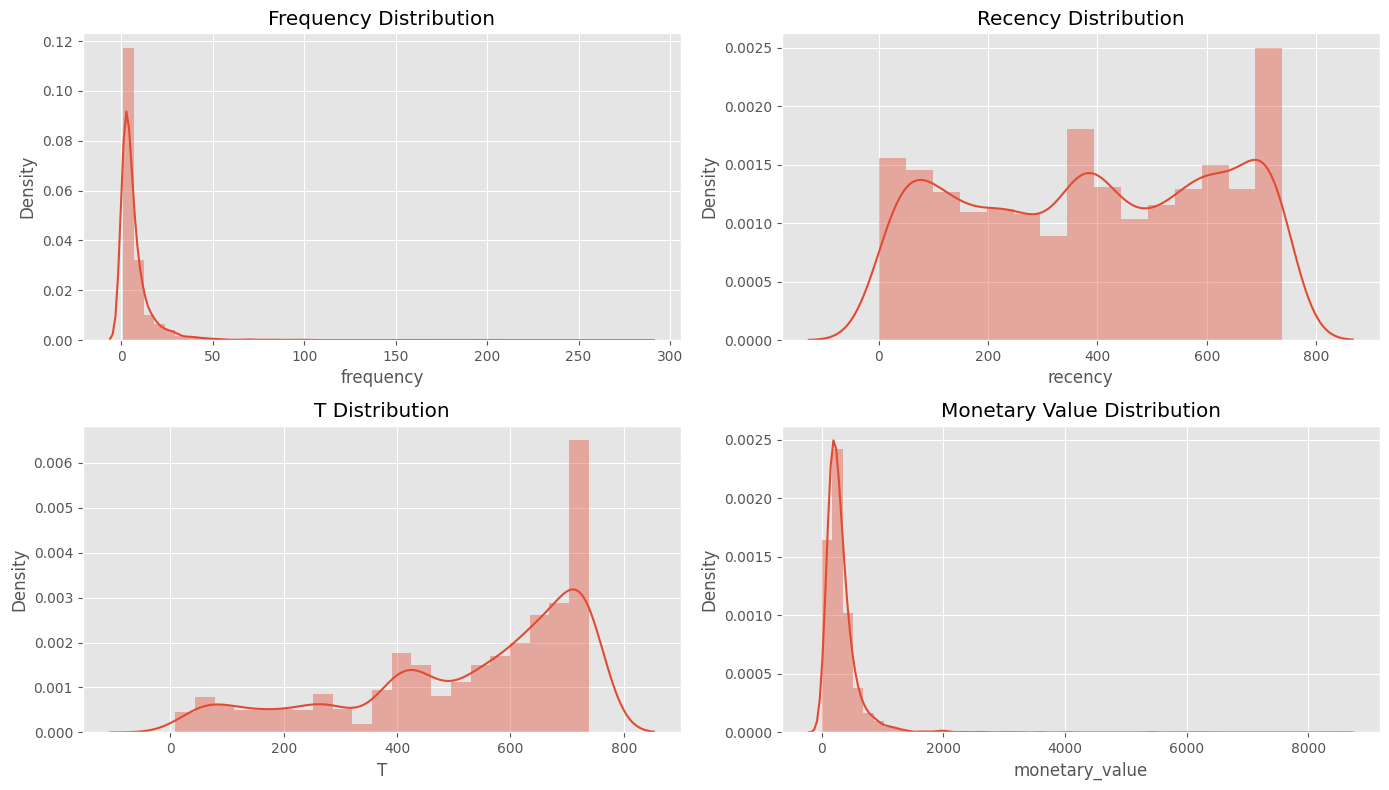

In [64]:
plt.figure(figsize=(14,8))

plt.subplot(221)
sns.distplot(summary["frequency"])
plt.title("Frequency Distribution")

plt.subplot(222)
sns.distplot(summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

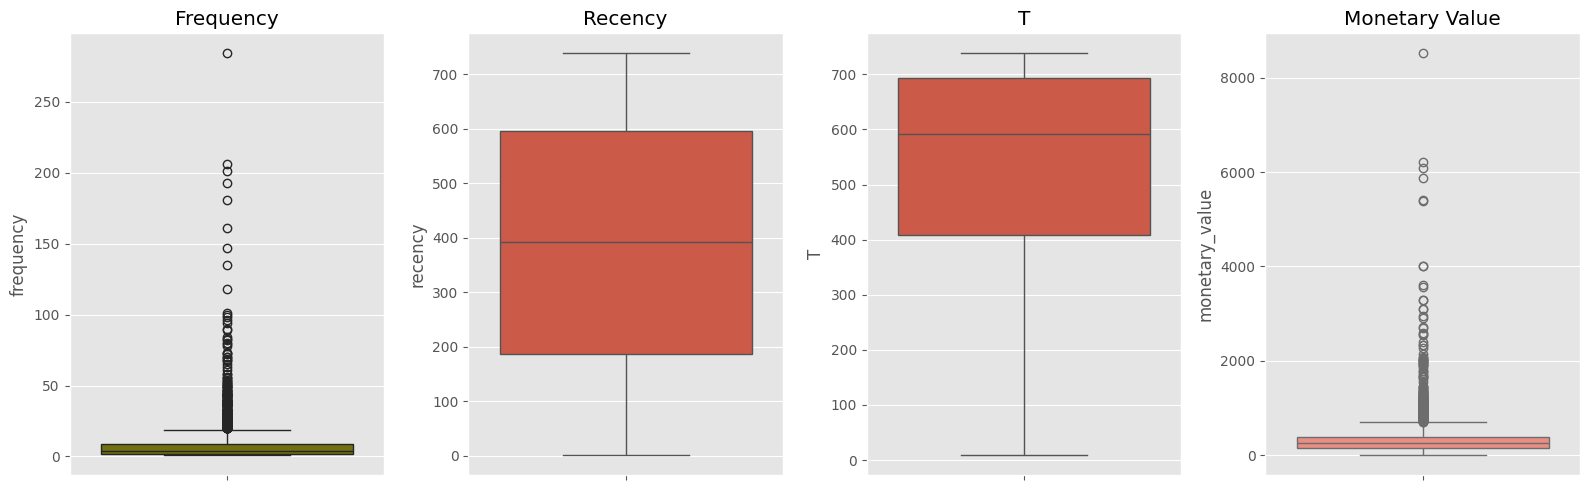

In [65]:
plt.figure(figsize=(16,5))

plt.subplot(141)
sns.boxplot(summary["frequency"], color = "olive")
plt.title("Frequency")

plt.subplot(142)
sns.boxplot(summary["recency"])
plt.title("Recency")

plt.subplot(143)
sns.boxplot(summary["T"])
plt.title("T")

plt.subplot(144)
sns.boxplot(summary["monetary_value"], color = "salmon")
plt.title("Monetary Value")

plt.tight_layout()

In [66]:
summary.describe(percentiles = [0.01,0.1,0.25,0.50,0.75,0.90,0.99])

,Customer ID,frequency,recency,T,monetary_value
count,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000
mean,15300.610036,7.710394,389.019594,525.313978,330.660850
std,1699.142670,12.811259,227.696105,203.847691,380.343579
min,12347.000000,1.000000,1.000000,9.000000,1.150000
1%,12406.840000,1.000000,10.840000,36.840000,23.238800
10%,12949.400000,1.000000,64.400000,184.000000,106.794000
25%,13834.000000,2.000000,187.000000,409.000000,160.876000
50%,15288.000000,4.000000,392.000000,591.000000,247.690000
75%,16771.000000,9.000000,596.000000,694.000000,381.096667
90%,17646.600000,17.000000,704.000000,733.000000,585.300571


As we can see how are frequency changing from 90 percentile to 99 percentile but same not the case with the recency as there is no much jump in the numbers so we can clearly see from there as well as there are some extreme values contains both in the frequency and monetary value.

## PARETO/NBD MODEL

In [67]:
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt

In [68]:
def get_model(data, penalizer_val, time):
    
    pareto_result = data.copy()

    pareto_model = ParetoNBDFitter(penalizer_coef=penalizer_val)
    pareto_model.fit(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

    # Calculating the predicted_purchases
    t = time
    pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

    pareto_result["Actual_Purchases"] = pareto_result["frequency"] / pareto_result["recency"] * time

    # Filling the null values
    pareto_result["Actual_Purchases"].fillna(0, inplace=True)

    # Calculating the error
    pareto_result["Prediction_Error"] = pareto_result["Actual_Purchases"] - pareto_result["predicted_purchases"]

    # Calculating the purchase prediction error metrics
    pareto_mse_purchase = mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_r2_purchase = r2_score(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_rmse_purchase = sqrt(mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"]))
    pareto_avg_error_purchase = pareto_result["Prediction_Error"].mean()
    
    # Printing the purchase prediction error metrics
    print("Predicted Purchase Mean Squared Error: %s" % pareto_mse_purchase)
    print("Predicted Purchase R2 Score: %s" % pareto_r2_purchase)
    print("Predicted Purchase Root Mean Squared Error: %s" % pareto_rmse_purchase)
    print("Predicted Purchase Average Purchases Error: %s" % pareto_avg_error_purchase)
    
    # Plotting the prediction v/s actual purchase plot
    plt.figure(figsize=(6, 4))
    plt.errorbar(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"], 
                 yerr=np.abs(pareto_result["Prediction_Error"]), fmt='o', color='darkseagreen',
                 ecolor='grey', elinewidth=1.5, capsize=0, alpha=0.2)
    plt.title("Prediction v/s Actual")
    plt.xlabel("Actual Purchases")
    plt.ylabel("Predicted Purchases")
    plt.show()

Predicted Purchase Mean Squared Error: 2.454906402540414
Predicted Purchase R2 Score: 0.05097352401301536
Predicted Purchase Root Mean Squared Error: 1.566814093164985
Predicted Purchase Average Purchases Error: 0.35242763832602925


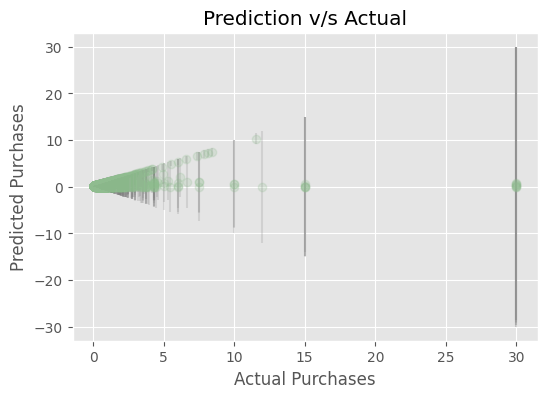

In [69]:
get_model(summary, 0.001, 30)


Based on the above errors, we have found that penalizer_coef = 0.1 is doing slightly better at minimizing the errors so we will be using 0.1 for our model.

In [70]:
pareto_model = lifetimes.ParetoNBDFitter(penalizer_coef = 0.1)

In [71]:
pareto_model.fit(summary["frequency"], summary["recency"],
                 summary["T"])

<lifetimes.ParetoNBDFitter: fitted with 4185 subjects, alpha: 87.55, beta: 2704.16, r: 1.43, s: 0.94>

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

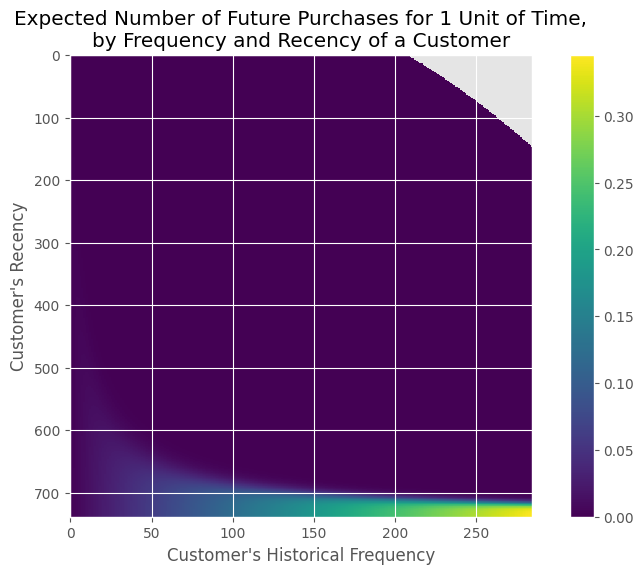

In [72]:
plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(pareto_model)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

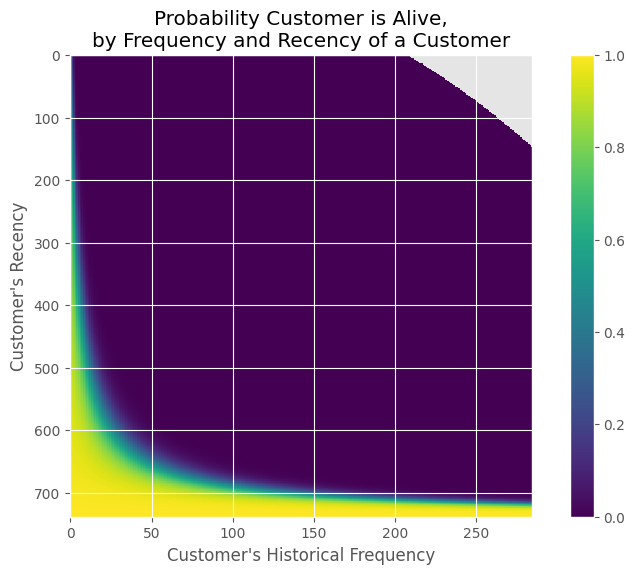

In [73]:
plt.figure(figsize=(10,6))
plot_probability_alive_matrix(pareto_model)

In [74]:
pareto_result = summary.copy()

In [75]:
pareto_result["p_not_alive"] = 1-pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])
pareto_result["p_alive"] = pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [76]:
pareto_result.head()

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive
0,12347.0,7.0,402.0,404.0,717.398571,0.000616,0.999384
1,12348.0,4.0,363.0,438.0,449.310000,0.034481,0.965519
2,12349.0,4.0,717.0,735.0,1107.172500,0.005235,0.994765
3,12352.0,8.0,356.0,392.0,218.182500,0.016045,0.983955
4,12353.0,1.0,204.0,408.0,89.000000,0.114215,0.885785


In [77]:
t = 30
pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [78]:
pareto_result

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases
0,12347.0,7.0,402.0,404.0,717.398571,0.000616,0.999384,0.511939
1,12348.0,4.0,363.0,438.0,449.310000,0.034481,0.965519,0.298012
2,12349.0,4.0,717.0,735.0,1107.172500,0.005235,0.994765,0.196252
3,12352.0,8.0,356.0,392.0,218.182500,0.016045,0.983955,0.577915
4,12353.0,1.0,204.0,408.0,89.000000,0.114215,0.885785,0.129794
...,...,...,...,...,...,...,...,...
4180,18281.0,1.0,397.0,577.0,80.820000,0.074942,0.925058,0.101102
4181,18282.0,2.0,119.0,126.0,38.195000,0.002466,0.997534,0.478475
4182,18283.0,18.0,655.0,658.0,146.405556,0.000874,0.999126,0.777947
4183,18286.0,2.0,247.0,723.0,362.740000,0.462469,0.537531,0.067988


<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

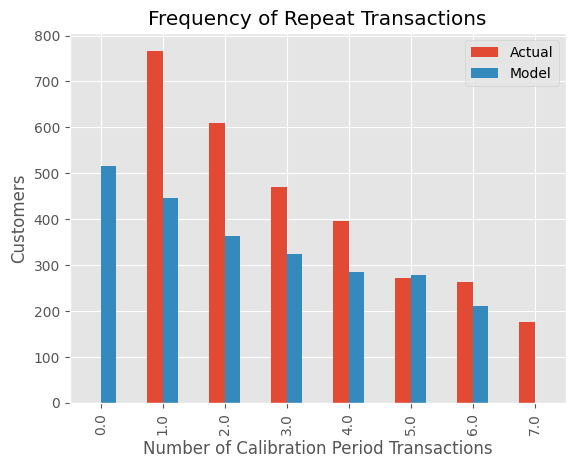

In [79]:
plot_period_transactions(pareto_model)

Dividing our dataset into training & holdout

In [80]:
pareto_summary_cal_holdout = calibration_and_holdout_data(data, "Customer ID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [81]:
pareto_summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Customer ID,,,,,
12346.0,10.0,400.0,541.0,0.0,184.0
12347.0,3.0,158.0,220.0,4.0,184.0
12348.0,3.0,190.0,254.0,1.0,184.0
12349.0,3.0,328.0,551.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0


In [82]:
pareto_model.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 5025 subjects, alpha: 63.81, beta: 801.28, r: 0.83, s: 0.76>

In [83]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

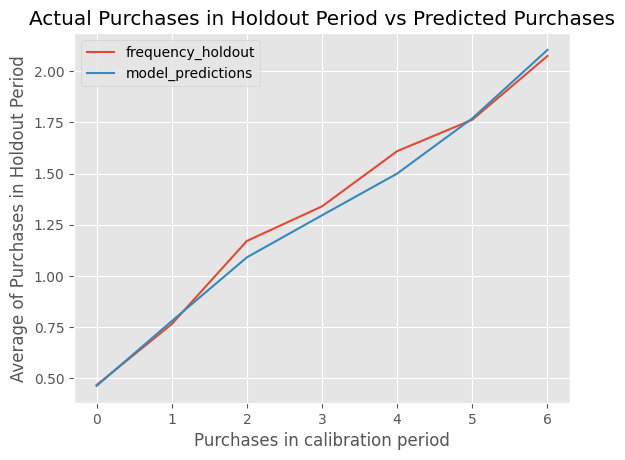

In [84]:
plot_calibration_purchases_vs_holdout_purchases(pareto_model, pareto_summary_cal_holdout)

In [85]:
pareto_summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Customer ID,,,,,
12346.0,10.0,400.0,541.0,0.0,184.0
12347.0,3.0,158.0,220.0,4.0,184.0
12348.0,3.0,190.0,254.0,1.0,184.0
12349.0,3.0,328.0,551.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0


In [86]:
pareto_result["actual30"] = pareto_result["frequency"]/pareto_result["recency"]*30

In [87]:
pareto_result["actual30"].fillna(0, inplace = True)

In [88]:
pareto_result["error"] = pareto_result["actual30"]-pareto_result["predicted_purchases"]

In [89]:
pareto_result.head()

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual30,error
0,12347.0,7.0,402.0,404.0,717.398571,0.000616,0.999384,0.511939,0.522388,0.010449
1,12348.0,4.0,363.0,438.0,449.310000,0.034481,0.965519,0.298012,0.330579,0.032566
2,12349.0,4.0,717.0,735.0,1107.172500,0.005235,0.994765,0.196252,0.167364,-0.028888
3,12352.0,8.0,356.0,392.0,218.182500,0.016045,0.983955,0.577915,0.674157,0.096242
4,12353.0,1.0,204.0,408.0,89.000000,0.114215,0.885785,0.129794,0.147059,0.017264


In [90]:
def get_metrics(true, predicted, error):
    
    print("Mean Squared Error: %s"%(mean_squared_error(true, predicted)))
    print("Root Mean Squared Error: %s"%(sqrt(mean_squared_error(true, predicted))))
    print("R2 Score: %s"%(r2_score(true, predicted)))
    
    sns.scatterplot(true, predicted, size = error, color = "darkolivegreen")
    plt.title("Actual Purchase v/s Predicted Purchase")
    plt.show()

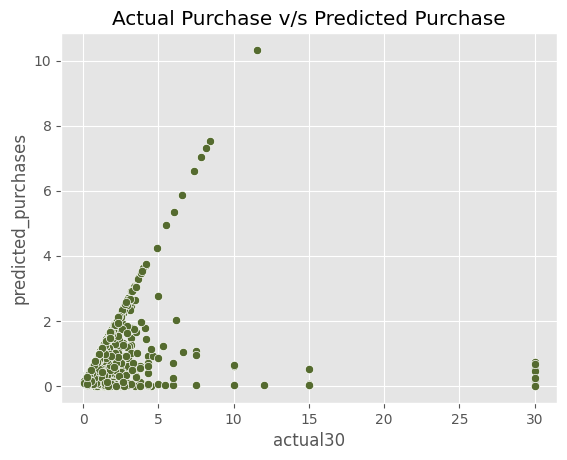

In [91]:
sns.scatterplot(x=pareto_result["actual30"], y=pareto_result["predicted_purchases"], color="darkolivegreen")
plt.title("Actual Purchase v/s Predicted Purchase")
plt.show()

In [92]:
from lifetimes.plotting import plot_history_alive

Get the history alive plot to check whether the customer is alive or not

In [93]:
def get_history_alive(t_, data_, id_):
    
    individual_alive = data[data["Customer ID"] == id_]
    plot_history_alive(pareto_model, t = t_, transactions = individual_alive, datetime_col = "InvoiceDate",
                  freq = "D")

ConversionError: Failed to convert value(s) to axis units: '2009-12-08 07:59:00'

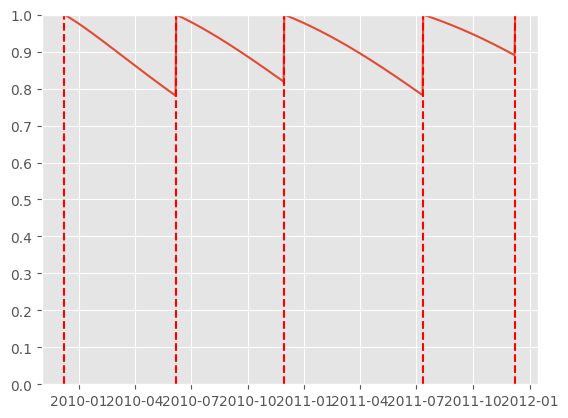

In [94]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])


data["InvoiceDate"] = data["InvoiceDate"].astype(str)

get_history_alive(30, data, 12358.0)

## GAMMA-GAMMA MODEL

Before proceding with our Gamma Gamma Model, we have to first filter the data where we are going to remove the values with 0 frequency and monetary values.

In [95]:
idx = pareto_result[(pareto_result["frequency"] <= 0.0)]

In [96]:
idx = idx.index

In [97]:
ggf_filter = pareto_result.drop(idx, axis = 0)

In [98]:
m_idx = ggf_filter[(ggf_filter["monetary_value"] <= 0.0)].index

In [99]:
ggf_filter = ggf_filter.drop(m_idx, axis = 0)

In [100]:
ggf_filter.reset_index().drop("index", axis = 1, inplace = True)

<Axes: >

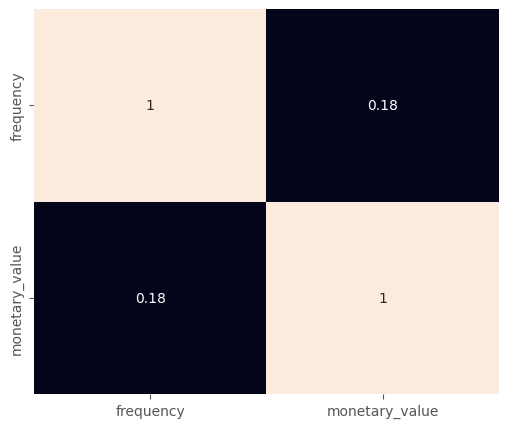

In [101]:
plt.figure(figsize=(6,5))
sns.heatmap(ggf_filter[["frequency", "monetary_value"]].corr(), annot = True, cbar = False)

In [102]:
ggf_model =  lifetimes.GammaGammaFitter(penalizer_coef=0.1)

In [103]:
ggf_model.fit(ggf_filter["frequency"], ggf_filter["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.02, q: 0.19, v: 0.95>

In [104]:
ggf_model.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,1.023190,0.024652,0.974873,1.071508
q,0.185956,0.003114,0.179852,0.192060
v,0.947145,0.025498,0.897169,0.997122


In [105]:
ggf_filter["expected_avg_sales_"] = ggf_model.conditional_expected_average_profit(ggf_filter["frequency"],
                                                                                     ggf_filter["monetary_value"])

In [106]:
ggf_filter.head()

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual30,error,expected_avg_sales_
0,12347.0,7.0,402.0,404.0,717.398571,0.000616,0.999384,0.511939,0.522388,0.010449,809.543574
1,12348.0,4.0,363.0,438.0,449.310000,0.034481,0.965519,0.298012,0.330579,0.032566,561.160804
2,12349.0,4.0,717.0,735.0,1107.172500,0.005235,0.994765,0.196252,0.167364,-0.028888,1382.358199
3,12352.0,8.0,356.0,392.0,218.182500,0.016045,0.983955,0.577915,0.674157,0.096242,242.408202
4,12353.0,1.0,204.0,408.0,89.000000,0.114215,0.885785,0.129794,0.147059,0.017264,440.041239


In [107]:
print("Mean Squared Error: %s" %(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"])))
print("Root Mean Squared Error: %s" %(sqrt(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"]))))
print("R2 Score: %s" %(r2_score(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"])))

Mean Squared Error: 793392.8848688784
Root Mean Squared Error: 890.7260436682417
R2 Score: -4.485799230636223


In [108]:
ggf_filter["predicted_clv"] = ggf_model.customer_lifetime_value(pareto_model,
                                                       ggf_filter["frequency"],
                                                       ggf_filter["recency"],
                                                       ggf_filter["T"],
                                                       ggf_filter["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

Top 5 customers with high CLV

In [109]:
ggf_filter[["Customer ID", "predicted_clv"]].sort_values(by = "predicted_clv", ascending = False).head(5)

,Customer ID,predicted_clv
4071,18102.0,494034.998550
1640,14646.0,426706.301657
3625,17450.0,252497.072638
1277,14156.0,239243.569730
1234,14096.0,225594.932057


Assuming 5% of Profit Margin

In [110]:
ggf_filter["profit_margin"] = ggf_filter["predicted_clv"]*0.05

Exporting the result to csv

In [111]:
ggf_filter.to_csv("customer_lifetime_value_prediction.csv")

## CUSTOMER SEGMENTATION USING PREDICTED CLV

We have calculated the CLV and deliver the same to the marketing team but now marketing team is interested to know the most profitable customers segment which they can target the deliver the best optimized campaigns. 

Our work is to deliver the requested data to the marketing team & to perform the same we will be going to perform the clustering on the predicted metrics.

In [112]:
ggf_filter.head()

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual30,error,expected_avg_sales_,predicted_clv,profit_margin
0,12347.0,7.0,402.0,404.0,717.398571,0.000616,0.999384,0.511939,0.522388,0.010449,809.543574,8446.919423,422.345971
1,12348.0,4.0,363.0,438.0,449.310000,0.034481,0.965519,0.298012,0.330579,0.032566,561.160804,3153.827696,157.691385
2,12349.0,4.0,717.0,735.0,1107.172500,0.005235,0.994765,0.196252,0.167364,-0.028888,1382.358199,5372.073755,268.603688
3,12352.0,8.0,356.0,392.0,218.182500,0.016045,0.983955,0.577915,0.674157,0.096242,242.408202,2827.901847,141.395092
4,12353.0,1.0,204.0,408.0,89.000000,0.114215,0.885785,0.129794,0.147059,0.017264,440.041239,844.427042,42.221352


In [113]:
col = ["predicted_purchases", "expected_avg_sales_", "predicted_clv", "profit_margin"]

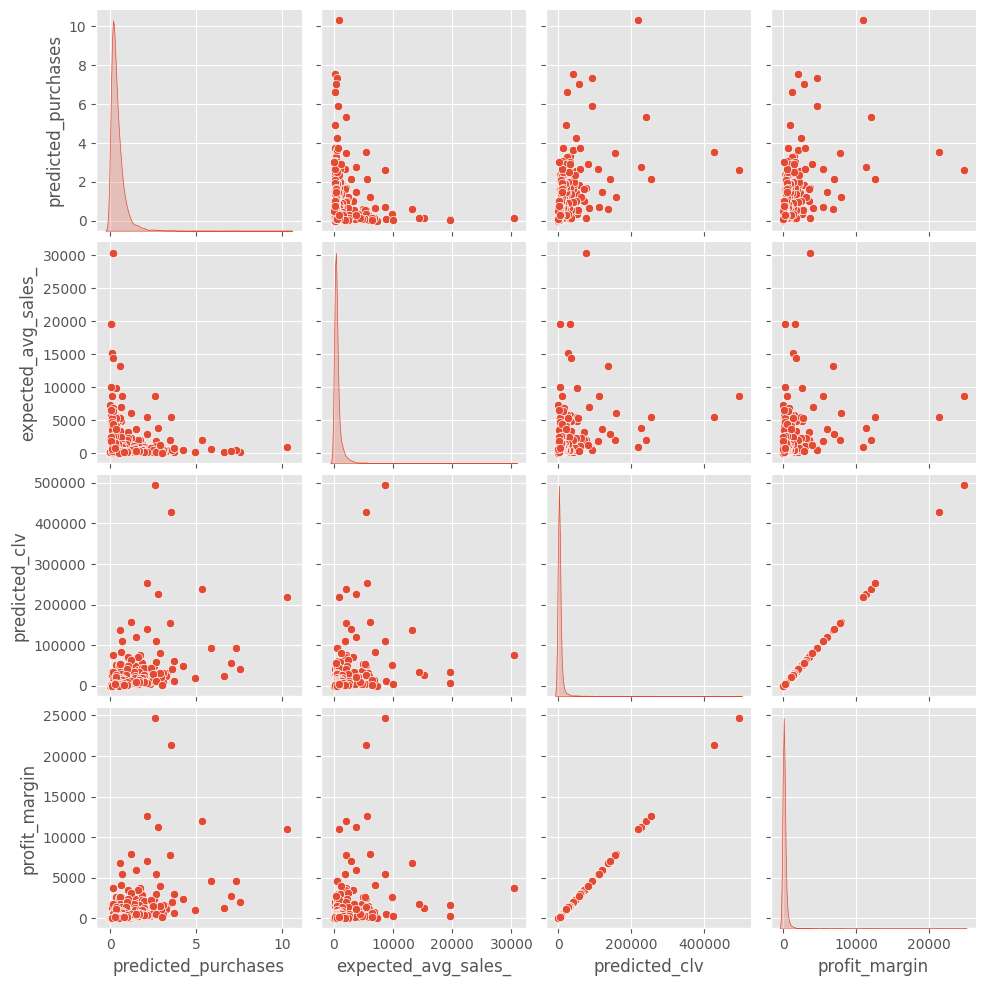

In [114]:
sns.pairplot(ggf_filter[col], diag_kind = "kde")

In [115]:
new_df = ggf_filter[col]

In [116]:
from sklearn.cluster import KMeans
from joblib import parallel_backend
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [117]:
inertia = []

for i in range(2, 11):
    cluster = KMeans(n_clusters = i, init = "k-means++").fit(new_df)
    inertia.append(cluster.inertia_)

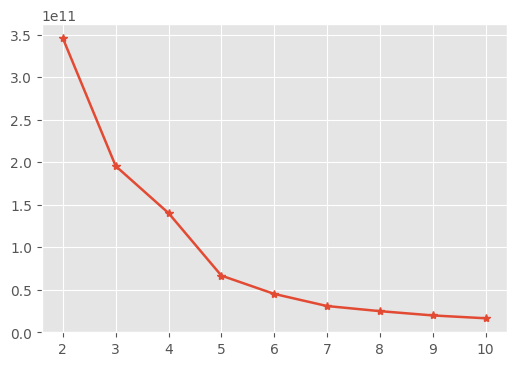

In [118]:
plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia, marker = "*", linewidth = 1.8)

In [119]:
# Identify and handle non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['float', 'int']).columns
data_numeric = data.drop(non_numeric_columns, axis=1)  # Drop non-numeric columns

# If you have categorical data, encode it using LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data_numeric[column] = label_encoder.fit_transform(data[column])

# Normalize the data
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)


In [120]:
# Fit KMeans model
k_model = KMeans(n_clusters=4, init="k-means++", max_iter=1000)
k_model.fit(data_numeric_scaled)

KMeans(max_iter=1000, n_clusters=4)

In [121]:
k_model_fit = k_model.fit(new_df)

In [122]:
new_df

,predicted_purchases,expected_avg_sales_,predicted_clv,profit_margin
0,0.511939,809.543574,8446.919423,422.345971
1,0.298012,561.160804,3153.827696,157.691385
2,0.196252,1382.358199,5372.073755,268.603688
3,0.577915,242.408202,2827.901847,141.395092
4,0.129794,440.041239,844.427042,42.221352
...,...,...,...,...
4180,0.101102,400.022878,630.830605,31.541530
4181,0.478475,64.211847,564.740902,28.237045
4182,0.777947,153.230929,2570.839105,128.541955
4183,0.067988,603.141334,555.637179,27.781859


In [123]:
centers = k_model_fit.cluster_centers_

In [124]:
centers

array([[3.79155485e-01, 5.67438218e+02, 3.11997042e+03, 1.55998521e+02],
       [3.26954163e+00, 4.45639078e+03, 1.82918445e+05, 9.14592224e+03],
       [1.79685994e+00, 3.03336686e+03, 4.19587043e+04, 2.09793521e+03],
       [3.05728228e+00, 7.02410745e+03, 4.60370650e+05, 2.30185325e+04]])

In [125]:
labels = k_model_fit.labels_

In [126]:
labels = pd.Series(labels, name = "Labels")

In [127]:
ggf_filter = pd.concat([ggf_filter, labels], axis = 1)

In [128]:
label_mapper = dict({0 : "Low", 3: "Medium", 1: "High", 2: "V_High"})

In [129]:
ggf_filter["Labels"] = ggf_filter["Labels"].map(label_mapper)

In [130]:
ggf_filter.groupby("Labels").mean().T

Labels,High,Low,Medium,V_High
Customer ID,14976.111111,15311.041951,16374.000000,14733.081081
frequency,77.666667,6.885854,83.000000,42.851351
recency,524.666667,386.927317,737.000000,479.040541
T,531.555556,525.768293,737.500000,493.648649
monetary_value,3221.763326,305.536200,6952.630519,1192.109518
p_not_alive,0.003192,0.154394,0.000145,0.007756
p_alive,0.996808,0.845606,0.999855,0.992244
predicted_purchases,3.269542,0.379155,3.057282,1.796860
actual30,3.921772,0.722495,3.379286,2.575178
error,0.652230,0.343340,0.322004,0.778318


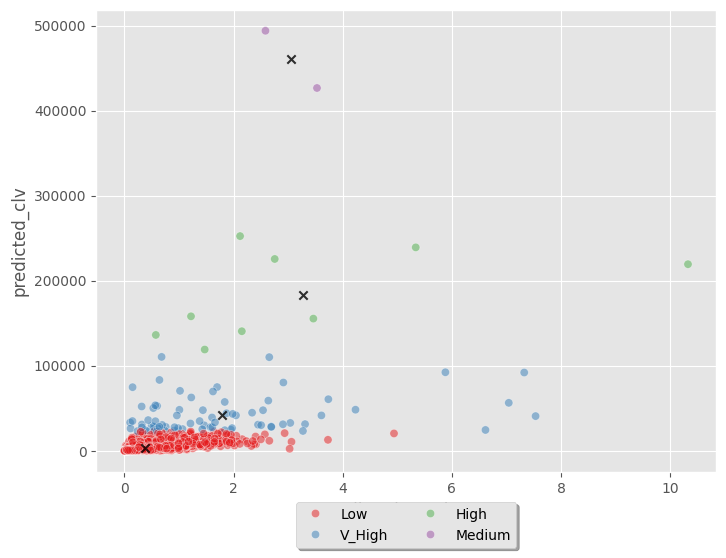

In [131]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "predicted_purchases", y = "predicted_clv", hue = "Labels", palette = "Set1", data = ggf_filter, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 2], marker = "x", color = "k", alpha = 0.8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

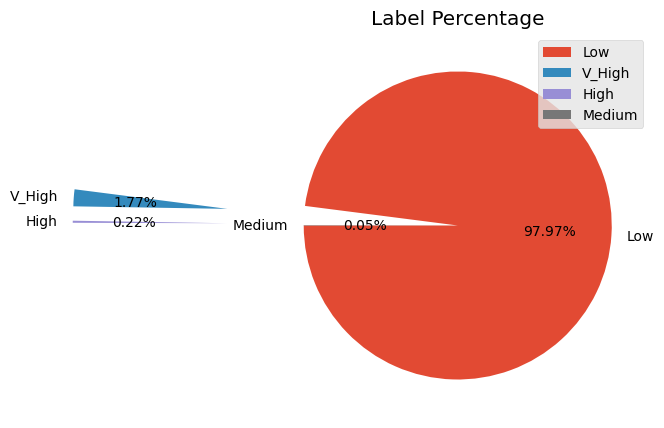

In [132]:
plt.figure(figsize=(5,5))
plt.pie(ggf_filter["Labels"].value_counts(), labels = ggf_filter["Labels"].unique(), startangle = 180, explode = [0.0,1.5,1.5,0.0], autopct = "%1.2f%%")
plt.title("Label Percentage")
plt.legend()

In [133]:
ggf_filter.to_csv("customer_segmentation_result.csv")

In [140]:
import pickle
#Saving our model - Pareto/NBD

# Extract the parameters or attributes needed for serialization
pareto_model_params = {
    'params': pareto_model.params_,
    # Add more attributes as needed
}

# Save the parameters to a file
with open('pareto_nbd.pkl', 'wb') as f:
    pickle.dump(pareto_model_params, f)


#Saving our 2nd model - Gamma Model
pickle.dump(ggf_model, open('gamma_model.pkl', 'wb'))

#Saving our 3rd Model - KMeans
pickle.dump(k_model, open('k_means.pkl', 'wb'))

Now we will deploy our model and for that we have saved the model using the above code.